In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [65]:
df = pd.read_csv('/l_a_crime.csv')

In [66]:
df.head()

MOMENT LOCATION  ... VICTIM_AGE OCCURRENCES
0  AFTERNOON      BAR  ...       21.0           1
1  AFTERNOON      BAR  ...       34.0           1
2  AFTERNOON      BAR  ...       29.0           1
3  AFTERNOON      BAR  ...       10.0           1
4  AFTERNOON      BAR  ...       14.0           1

[5 rows x 6 columns]

In [67]:
df.MOMENT.nunique()

3

In [68]:
mom_encoder = OneHotEncoder()

In [69]:
df.CRIME.nunique()

8

In [70]:
crime_encoder = OneHotEncoder()

In [71]:
df.LOCATION.nunique()

15

In [72]:
loc_encoder = OneHotEncoder()

In [73]:
df.VICTIM_SEX.nunique()

2

In [74]:
victimsex_encoder = LabelEncoder()

In [75]:
mom_dummies = mom_encoder.fit_transform(df[['MOMENT']]).toarray()
dmom = pd.DataFrame(mom_dummies,columns=sorted(df.MOMENT.unique()))

In [76]:
crime_dummies = crime_encoder.fit_transform(df[['CRIME']]).toarray()
dcrime = pd.DataFrame(crime_dummies,columns=sorted(df.CRIME.unique()))

In [77]:
loc_dummies = loc_encoder.fit_transform(df[['LOCATION']]).toarray()
dloc = pd.DataFrame(loc_dummies,columns=sorted(df.LOCATION.unique()))

In [78]:
df['VICTIM_SEX'] = victimsex_encoder.fit_transform(df['VICTIM_SEX'],)

In [79]:
df.drop( columns =['MOMENT','LOCATION','CRIME'], axis= 1,inplace=True)

In [80]:
df = pd.concat([dmom,dcrime,dloc,df],axis = 1)

In [81]:
df.head()


AFTERNOON  MORNING  NIGHT  ...  VICTIM_SEX  VICTIM_AGE  OCCURRENCES
0        1.0      0.0    0.0  ...           1        21.0            1
1        1.0      0.0    0.0  ...           1        34.0            1
2        1.0      0.0    0.0  ...           1        29.0            1
3        1.0      0.0    0.0  ...           0        10.0            1
4        1.0      0.0    0.0  ...           0        14.0            1

[5 rows x 29 columns]

APPLYING RANDOM FOREST REGRESSOR ALGO 

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [83]:
X = df.iloc[:,:-1]
y = df['OCCURRENCES']

In [84]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size= 0.2,random_state = 0)

In [85]:
Xtrain

AFTERNOON  MORNING  NIGHT  ...  VEHICLE  VICTIM_SEX  VICTIM_AGE
3284         1.0      0.0    0.0  ...      0.0           1   21.000000
6673         0.0      1.0    0.0  ...      0.0           0   27.000000
14416        0.0      0.0    1.0  ...      1.0           1   48.000000
3378         1.0      0.0    0.0  ...      0.0           0   56.000000
5832         0.0      1.0    0.0  ...      0.0           0   46.000000
...          ...      ...    ...  ...      ...         ...         ...
13123        0.0      0.0    1.0  ...      0.0           0   49.000000
3264         1.0      0.0    0.0  ...      0.0           0   58.000000
9845         0.0      1.0    0.0  ...      1.0           1   41.000000
10799        0.0      0.0    1.0  ...      0.0           1   33.734277
2732         1.0      0.0    0.0  ...      0.0           1   56.000000

[11744 rows x 28 columns]

In [93]:
model_score = []
for tree in range(50,205,5):
    model = RandomForestRegressor()
    model.fit(Xtrain,ytrain)
    score = model.score(Xtest,ytest)*100
    model_score.append(score)
    print(tree , score)

50 92.85863549938381
55 91.48369527319605
60 91.70080873781197
65 90.86269963788084
70 90.9448260688866
75 90.25972257186939
80 92.6250965123244
85 92.89114011956497
90 91.3572676087014
95 91.44210335900542
100 90.9773115747931
105 91.45088999325606
110 92.10523737309047
115 88.9611344051698
120 90.71346181740061
125 90.10753161998143
130 92.5066580573924
135 91.40714866079655
140 92.10188359402007
145 90.82800179249237
150 90.78689679846521
155 90.6382821579277
160 93.45094832303977
165 92.01837886111228
170 89.83189805241504
175 92.1919327770811
180 91.12057943044377
185 92.29585634021656
190 91.94682754436514
195 91.98461467216232
200 92.73003238324783


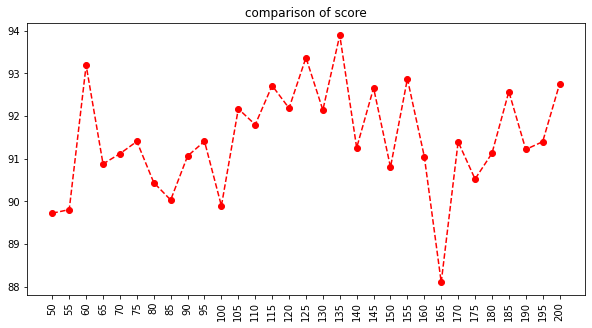

In [87]:
plt.subplots(figsize=(10,5))
plt.plot(range(50,205,5),model_score,'ro--',label = 'prediction scores')
plt.title("comparison of score")
plt.xticks(range(50,205,5),rotation = 90)
plt.show()

In [90]:
model = RandomForestRegressor(n_estimators=75)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

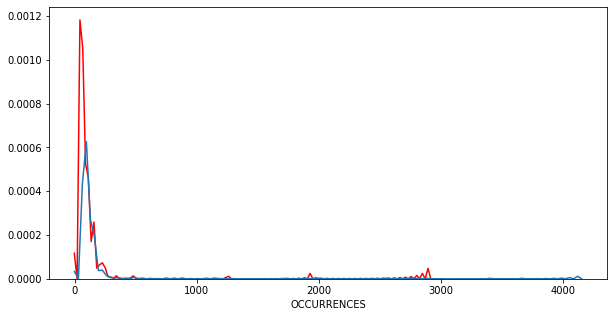

In [91]:
ypred = model.predict(Xtest)
fig,ax = plt.subplots(figsize = (10,5))
sns.distplot(ypred, hist = False, ax = ax, color = 'red')
sns.distplot(y, hist=False , ax =ax)
plt.show()